# Word embeddings using gensim

<a target="_blank" href="https://colab.research.google.com/github/JaTaSn/jts-TATA24/blob/main/Kod/wordembeddings-new.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

## Loading the model

In [16]:
# first install gensim e.g. via "mamba install gensim"
# similarly for numpy and matplotlib

In [1]:
import numpy as np
import math
import gensim.downloader as api
import matplotlib.pyplot as plt

In [2]:
# load dataset/model 
# see https://github.com/piskvorky/gensim-data
# for choice of model
#embedd = api.load('glove-wiki-gigaword-50')
# embedd = api.load('glove-twitter-25')
embedd = api.load('word2vec-google-news-300')

In [3]:
def restrict_embedd(w2v, restricted_word_set=[], min_word_length=2, max_word_length=10):
    new_index_to_key = []
    new_key_to_index = {}
    new_vectors = []
    for ind, word in enumerate(w2v.index_to_key):
        if (not word in restricted_word_set) and len(word) >= min_word_length and len(word) <= max_word_length:
            new_key_to_index[word] = len(new_index_to_key)
            new_index_to_key.append(word)
            new_vectors.append(w2v.vectors[ind])
    w2v.index_to_key = new_index_to_key
    w2v.key_to_index = new_key_to_index
    w2v.vectors = np.array(new_vectors)


badwords = ["'s", "''", "``", "--", "n't", "u.s.", "ii", "(970)"]
restrict_embedd(embedd, restricted_word_set=badwords)            

In [4]:
# most common words

NWORDS=len(embedd)
N = 200
print(f'The database contains (after pruning) {NWORDS} words.')
print(f'The {N} most common ones are: \n')
for index, word in enumerate(embedd.index_to_key):
    if index == N:
        break
    print(f"word #{index}/{len(embedd.index_to_key)} is {word}")


The database contains (after pruning) 1067115 words.
The 200 most common ones are: 

word #0/1067115 is </s>
word #1/1067115 is in
word #2/1067115 is for
word #3/1067115 is that
word #4/1067115 is is
word #5/1067115 is on
word #6/1067115 is ##
word #7/1067115 is The
word #8/1067115 is with
word #9/1067115 is said
word #10/1067115 is was
word #11/1067115 is the
word #12/1067115 is at
word #13/1067115 is not
word #14/1067115 is as
word #15/1067115 is it
word #16/1067115 is be
word #17/1067115 is from
word #18/1067115 is by
word #19/1067115 is are
word #20/1067115 is have
word #21/1067115 is he
word #22/1067115 is will
word #23/1067115 is has
word #24/1067115 is ####
word #25/1067115 is his
word #26/1067115 is an
word #27/1067115 is this
word #28/1067115 is or
word #29/1067115 is their
word #30/1067115 is who
word #31/1067115 is they
word #32/1067115 is but
word #33/1067115 is had
word #34/1067115 is year
word #35/1067115 is were
word #36/1067115 is we
word #37/1067115 is more
word #38/10

## Cosine similarity, most similar words

In [28]:
# look at some vectors

In [5]:
king = embedd['king']; king

array([ 1.25976562e-01,  2.97851562e-02,  8.60595703e-03,  1.39648438e-01,
       -2.56347656e-02, -3.61328125e-02,  1.11816406e-01, -1.98242188e-01,
        5.12695312e-02,  3.63281250e-01, -2.42187500e-01, -3.02734375e-01,
       -1.77734375e-01, -2.49023438e-02, -1.67968750e-01, -1.69921875e-01,
        3.46679688e-02,  5.21850586e-03,  4.63867188e-02,  1.28906250e-01,
        1.36718750e-01,  1.12792969e-01,  5.95703125e-02,  1.36718750e-01,
        1.01074219e-01, -1.76757812e-01, -2.51953125e-01,  5.98144531e-02,
        3.41796875e-01, -3.11279297e-02,  1.04492188e-01,  6.17675781e-02,
        1.24511719e-01,  4.00390625e-01, -3.22265625e-01,  8.39843750e-02,
        3.90625000e-02,  5.85937500e-03,  7.03125000e-02,  1.72851562e-01,
        1.38671875e-01, -2.31445312e-01,  2.83203125e-01,  1.42578125e-01,
        3.41796875e-01, -2.39257812e-02, -1.09863281e-01,  3.32031250e-02,
       -5.46875000e-02,  1.53198242e-02, -1.62109375e-01,  1.58203125e-01,
       -2.59765625e-01,  

In [6]:
queen = embedd['queen']; queen

array([ 0.00524902, -0.14355469, -0.06933594,  0.12353516,  0.13183594,
       -0.08886719, -0.07128906, -0.21679688, -0.19726562,  0.05566406,
       -0.07568359, -0.38085938,  0.10400391, -0.00081635,  0.1328125 ,
        0.11279297,  0.07275391, -0.046875  ,  0.06591797,  0.09423828,
        0.19042969,  0.13671875, -0.23632812, -0.11865234,  0.06542969,
       -0.05322266, -0.30859375,  0.09179688,  0.18847656, -0.16699219,
       -0.15625   , -0.13085938, -0.08251953,  0.21289062, -0.35546875,
       -0.13183594,  0.09619141,  0.26367188, -0.09472656,  0.18359375,
        0.10693359, -0.41601562,  0.26953125, -0.02770996,  0.17578125,
       -0.11279297, -0.00411987,  0.14550781,  0.15625   ,  0.26757812,
       -0.01794434,  0.09863281,  0.05297852, -0.03125   , -0.16308594,
       -0.05810547, -0.34375   , -0.17285156,  0.11425781, -0.09033203,
        0.13476562,  0.27929688, -0.04980469,  0.12988281,  0.17578125,
       -0.22167969, -0.01190186,  0.140625  , -0.18164062,  0.11

In [7]:
# What is most similar to king?
embedd.most_similar(positive=['king'])

[('kings', 0.7138045430183411),
 ('queen', 0.6510956883430481),
 ('monarch', 0.6413194537162781),
 ('prince', 0.6159993410110474),
 ('sultan', 0.5864824056625366),
 ('ruler', 0.5797567367553711),
 ('princes', 0.5646552443504333),
 ('throne', 0.5422105193138123),
 ('royal', 0.5239794254302979),
 ('kingdom', 0.5210405588150024)]

In [8]:
# What is the female counterpart of a king?
embedd.most_similar(positive=['king', 'woman'], 
                             negative=['man'])

[('queen', 0.7118193507194519),
 ('monarch', 0.6189674139022827),
 ('princess', 0.5902431011199951),
 ('prince', 0.5377321839332581),
 ('kings', 0.5236844420433044),
 ('queens', 0.5181134343147278),
 ('sultan', 0.5098593831062317),
 ('monarchy', 0.5087411999702454),
 ('throne', 0.5005807876586914),
 ('royal', 0.493820458650589)]

In [9]:
# What is the female counterpart of a king?
embedd.most_similar(positive=['king', 'she'], 
                             negative=['he'])

[('queen', 0.7633836269378662),
 ('princess', 0.6342118382453918),
 ('queens', 0.5744965076446533),
 ('monarch', 0.5577755570411682),
 ('goddess', 0.5278830528259277),
 ('princesses', 0.5202734470367432),
 ('empress', 0.5119601488113403),
 ('queendom', 0.5091063380241394),
 ('Queen_Bee', 0.4829074442386627),
 ('prince', 0.47732123732566833)]

In [35]:
# When we think of a female doctor, we think also of
embedd.most_similar(positive=['doctor', 'she'], 
                             negative=['he'])

[('aunt', 1.0437673330307007),
 ('pregnant', 1.0064847469329834),
 ('child', 0.9906520247459412),
 ('girl', 0.9660611152648926),
 ('boyfriend', 0.8969284296035767),
 ('patient', 0.8677344918251038),
 ('popmusic', 0.8605092167854309),
 ('girlfriend', 0.8590418100357056),
 ('parents', 0.8541679978370667),
 ('lecrone', 0.8412861824035645)]

In [10]:
# Cosine similarity: measures cosine of angle between vectors, scale invariant, (-1,1)
# Ortogonal projection length: project onto second vector, measure length, depends on length of first vector, in R
def cos_sim(u, v):
    return np.inner(u,v)/math.sqrt(np.inner(u,u)*np.inner(v,v))

def ort_proj_len(u, v):
    return np.inner(u,v)/math.sqrt(np.inner(v,v))

In [11]:
# project on this axis for gender bias
he = embedd['he']; she = embedd['she'] ; gbias = he - she; gbias

array([ 0.10400391,  0.15966797,  0.10339355,  0.00952148, -0.09692383,
        0.05322266, -0.03662109, -0.00244141,  0.24707031, -0.04418945,
       -0.07867432, -0.03515625,  0.02099609,  0.05639648, -0.13867188,
       -0.01293945, -0.02197266,  0.12353516,  0.0390625 ,  0.05334473,
       -0.0423584 ,  0.03466797,  0.06298828,  0.07995605, -0.01464844,
       -0.01269531,  0.03222656,  0.04504395,  0.05859375,  0.21582031,
        0.08361816,  0.19482422,  0.19787598,  0.11779785,  0.06591797,
        0.16455078, -0.00878906,  0.01611328,  0.03872681,  0.06237793,
        0.13964844,  0.00219727,  0.05957031,  0.09204102,  0.03924561,
       -0.0234375 , -0.03710938, -0.08666992, -0.05957031, -0.18066406,
       -0.07714844,  0.12182617,  0.01635742, -0.12188721,  0.12426758,
       -0.00720215,  0.07470703,  0.06347656, -0.08618164,  0.06201172,
       -0.06640625,  0.14257812,  0.00378418, -0.13061523,  0.01513672,
       -0.03710938, -0.11425781, -0.26367188,  0.03326416,  0.04

In [12]:
doctor = embedd['doctor']
sim = embedd.most_similar(positive=['doctor'], 
                             negative=[])
print(sim)
print()
for li in sim:
    word = li[0]
    w = embedd[word]
    print(f'{word} \t  {cos_sim(w,doctor)} \t {ort_proj_len(w,doctor)}')

[('physician', 0.7806021571159363), ('doctors', 0.747657299041748), ('surgeon', 0.6793398261070251), ('dentist', 0.6785441040992737), ('pharmacist', 0.653485894203186), ('nurse', 0.6319523453712463), ('oncologist', 0.6310990452766418), ('urologist', 0.6247765421867371), ('physican', 0.6148297786712646), ('internist', 0.6005518436431885)]

physician 	  0.7806022440529521 	 2.428608603321067
doctors 	  0.7476573415730154 	 2.1315265380756605
surgeon 	  0.6793397404206463 	 2.430172602792692
dentist 	  0.6785440931786159 	 2.1374731484303187
pharmacist 	  0.6534858839989298 	 2.167617633623053
nurse 	  0.6319523567864634 	 1.9100088026265867
oncologist 	  0.6310990305351898 	 2.4948105479167135
urologist 	  0.6247766600806798 	 2.4555971406968773
physican 	  0.6148297377659286 	 1.542237048639317
internist 	  0.6005519610928487 	 2.3019870436048677


## Genderdness for words

In [13]:
def genderness(word):
    return cos_sim(embedd[word], embedd['he'] - embedd['she'])

def gend_op(word):
    return ort_proj_len(embedd[word], embedd['he'] - embedd['she'])

In [14]:
[(genderness(_), gend_op(_)) for _ in ['he', 'man', 'king', 'beard']]

[(0.23826271460959786, 0.419539721690385),
 (0.10550992747421098, 0.24379305310343455),
 (0.14285232303900597, 0.41459443648379607),
 (0.20908118476978327, 0.81640426460603)]

In [15]:
[(genderness(_), gend_op(_)) for _ in ['she', 'woman', 'queen', 'pink']]

[(-0.62127908684436, -1.3558892093393167),
 (-0.4173189628327415, -1.1082422285721691),
 (-0.35344329210859976, -1.0703338363618178),
 (-0.2547677774646442, -0.6789510922768757)]

In [16]:
N = 5
glist = [ (word, genderness(word), gend_op(word)) for index, word in enumerate(embedd.index_to_key)]
glist[:N]

[('</s>', -0.004871442440773853, -8.170820375320472e-05),
 ('in', 0.03770246630303085, 0.05005935485074874),
 ('for', 0.048060378173389054, 0.0665107775111531),
 ('that', 0.03640673886082346, 0.04638128554956094),
 ('is', 0.036779168968579856, 0.06921384131832134)]

In [17]:
sglist = sorted(glist, key=lambda foo: foo[1])
sg_op_list = sorted(glist, key=lambda foo: foo[2])

In [18]:
# most female words
N = 50
sglist[:N]


[('she', -0.62127908684436, -1.3558892093393167),
 ('her', -0.5820369927529712, -1.322346113012596),
 ('hers', -0.5125396560377856, -1.2446260665695994),
 ('herself', -0.4826614095024992, -1.5020838507534358),
 ('Satyana', -0.4781283017449058, -0.9355632657252019),
 ('Anslee', -0.4656000306014895, -0.963043600311183),
 ('pagaent', -0.46485477907225775, -0.7277558710682579),
 ('Supermom', -0.4451677321230262, -1.407845858795008),
 ('Saleisha', -0.44278791950664537, -1.4591641037030396),
 ('motherhood', -0.4414482725012257, -1.5716308686773584),
 ('momager', -0.4404116043437662, -0.8386964543673232),
 ('Analeigh', -0.43979880069457256, -1.1832688631488604),
 ('Tyra', -0.4380096449764799, -1.5340042124243038),
 ('She', -0.4359318394967731, -1.1494968059988835),
 ('Aimee', -0.4335808469733453, -1.1379890067326413),
 ('Carrie', -0.431637010228272, -1.0684503146568372),
 ('Momlogic', -0.429900060484158, -1.0288820571937825),
 ('Heidi', -0.4296171060727654, -1.1213446291848959),
 ('Jaslene', 

In [19]:
# sort after ortproj
sg_op_list[:N]

[('Clijsters', -0.40946165622675323, -2.233958935178276),
 ('Dementieva', -0.396155598672441, -2.219459202104322),
 ('Sharapova', -0.3976135505683293, -2.114863855086594),
 ('Zvonareva', -0.376635325795745, -2.056762998295263),
 ('Kuznetsova', -0.37689315120151795, -2.009758751303423),
 ('rbeck', -0.3205671893728534, -1.9824932101701096),
 ('Mauresmo', -0.36416221897242673, -1.9775703510382912),
 ('Radwanska', -0.349584833494226, -1.9673396294431145),
 ('Petrova', -0.4005989833423787, -1.9477571003807446),
 ('Hantuchova', -0.3679994752302448, -1.9331500712963612),
 ('Vaidisova', -0.36660804130914126, -1.9265921230243856),
 ('Pironkova', -0.33211580780442806, -1.9224018042391142),
 ('VanDerveer', -0.37026380551394994, -1.9114192048436962),
 ('Hingis', -0.35373381209619303, -1.906375486626288),
 ('Slutskaya', -0.3256252267806081, -1.89723531684675),
 ('Henin', -0.3532734322362093, -1.885120670682974),
 ('Li_Na', -0.34495661332540534, -1.8843906818060114),
 ('Wozniacki', -0.33616273895189

In [20]:
# male words
sglist[-N:]

[('season.He', 0.24613352499654206, 0.44224048230490814),
 ('freeagent', 0.24640404809619423, 0.4856589409432033),
 ('Don_Kojis', 0.24643576334803796, 0.2618214182550401),
 ('Jörg_Butt', 0.24744276176510985, 0.21778570540906322),
 ('Gley', 0.24748598310070288, 0.2913811837665461),
 ('THIRD_SHOT', 0.24836046189326924, 0.3786006871929646),
 ('C._Krulak', 0.248613166780864, 0.40634889251336825),
 ('&&&&', 0.24919949082009063, 0.5917669737049603),
 ('boyhood', 0.24923066159419996, 0.8197786502756973),
 ('Signed_RB', 0.2503345163525905, 0.6925713740713548),
 ('Dan_Themig', 0.2510421529165407, 0.4119641063457751),
 ('Javy_Glatt', 0.251115874919461, 0.3565343696338515),
 ('verteran', 0.25186004272911366, 0.3993679038698602),
 ('Forza_Juve', 0.2521810569579934, 0.200793975492136),
 ('engineroom', 0.252843232675753, 0.3532063804242634),
 ('predecesor', 0.25346400488276, 0.3780317766195188),
 ('Ante_Juric', 0.2539159540635468, 0.2400872785354737),
 ('outleap', 0.2548519788854984, 0.5895640482943

In [21]:
# even manlier words?
sg_op_list[-N:]

[('Signed_WR', 0.22745396978974836, 0.8365516756056592),
 ('FanGraphs', 0.18912360330263417, 0.8374410641877273),
 ('Karrar', 0.19250508988240014, 0.8412825030792628),
 ('Lou_Gorman', 0.19507257203844922, 0.8420266593268138),
 ('journeymen', 0.2354271127142124, 0.8438234310659154),
 ('salary_cap', 0.15961578236672222, 0.8454063493674596),
 ('Arms_Hell', 0.13584104427033872, 0.8498506736642789),
 ('platooning', 0.21707445493355543, 0.8545144914893165),
 ('UFAs', 0.21330232030902513, 0.855123151273134),
 ('PA_Sport', 0.13303837396746765, 0.8565875605268637),
 ('J._Phillip', 0.13073595721762232, 0.8623356857814511),
 ('VDV', 0.22345691439614765, 0.8651666755735193),
 ('Draft_Pick', 0.17397910273384753, 0.8765583158297225),
 ('FB_LB', 0.18673358886181313, 0.8769705795994567),
 ('dangerman', 0.20923929643985426, 0.8800126027837519),
 ('AM_EST', 0.14150612376996868, 0.8805830576677358),
 ('Rod_Graves', 0.1596676003505382, 0.8809653752418183),
 ('Replays', 0.14665598239513855, 0.8843064575190

## Correlation between word length and genderness

In [22]:
#correlation length of words, frequency of words to gender bias
N = len(embedd)
 
x1 = []
x2 = []
y1 = []
y2 = []
for index, word in enumerate(embedd.index_to_key):
    if index == N:
        break
    s= embedd[word]
    wfreq = embedd.get_vecattr(word, "count")/NWORDS  # returns count of "my-word"
    wlen = len(word)
    x1.append(wlen)
    x2.append(wfreq)
    cossim = genderness(word)
    ortprojlen = gend_op(word)
    y1.append(cossim)
    y2.append(ortprojlen)



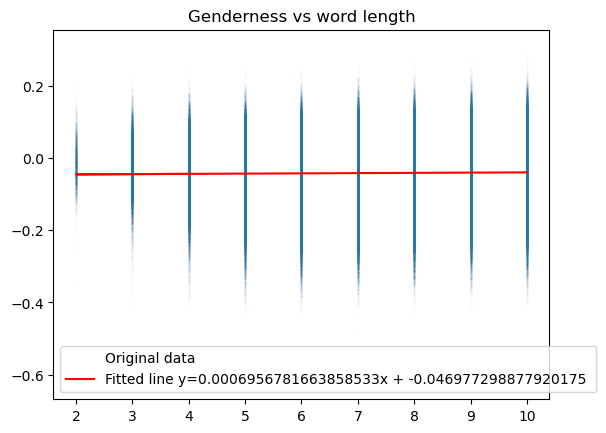

In [23]:
x=np.array(x1)
y=np.array(y1)
A = np.vstack([x, np.ones(len(x))]).T
m, c = np.linalg.lstsq(A, y,rcond=None)[0]
_ = plt.plot(x, y, 'o', label='Original data', markersize=0.01)
_ = plt.plot(x, m*x + c, 'r', label=f'Fitted line y={m}x + {c} ')
_ = plt.title('Genderness vs word length')
_ = plt.legend()
plt.show()

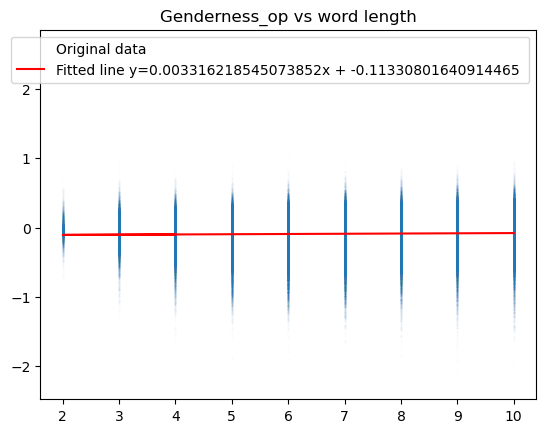

In [25]:
x=np.array(x1)
y=np.array(y2)
A = np.vstack([x, np.ones(len(x))]).T
m, c = np.linalg.lstsq(A, y,rcond=None)[0]
_ = plt.plot(x, y, 'o', label='Original data', markersize=0.01)
_ = plt.plot(x, m*x + c, 'r', label=f'Fitted line y={m}x + {c} ')
_ = plt.title('Genderness_op vs word length')
_ = plt.legend()
plt.show()

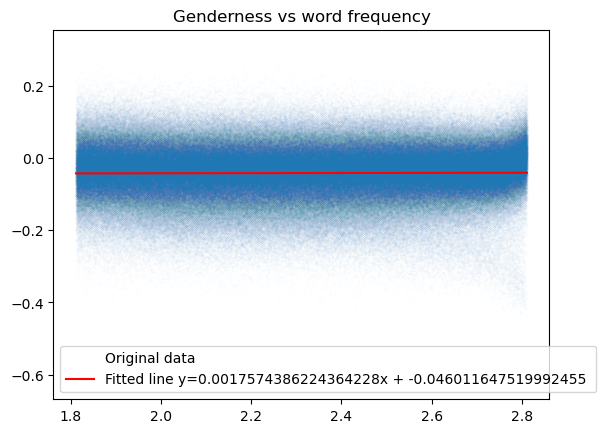

In [26]:
x=np.array(x2)
y=np.array(y1)
A = np.vstack([x, np.ones(len(x))]).T
m, c = np.linalg.lstsq(A, y,rcond=None)[0]
_ = plt.plot(x, y, 'o', label='Original data', markersize=0.01)
_ = plt.plot(x, m*x + c, 'r', label=f'Fitted line y={m}x + {c} ')
_ = plt.title('Genderness vs word frequency')
_ = plt.legend()
plt.show()



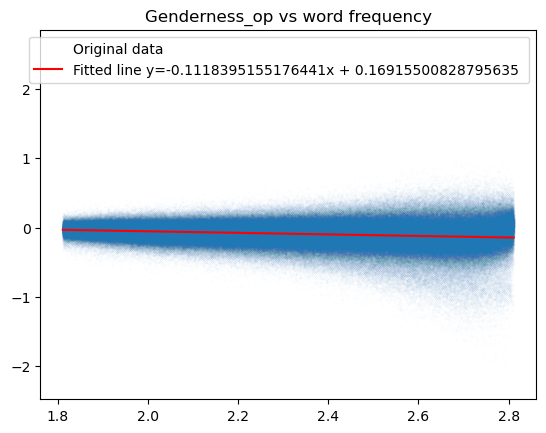

In [27]:
x=np.array(x2)
y=np.array(y2)
A = np.vstack([x, np.ones(len(x))]).T
m, c = np.linalg.lstsq(A, y,rcond=None)[0]
_ = plt.plot(x, y, 'o', label='Original data', markersize=0.01)
_ = plt.plot(x, m*x + c, 'r', label=f'Fitted line y={m}x + {c} ')
_ = plt.title('Genderness_op vs word frequency')
_ = plt.legend()
plt.show()


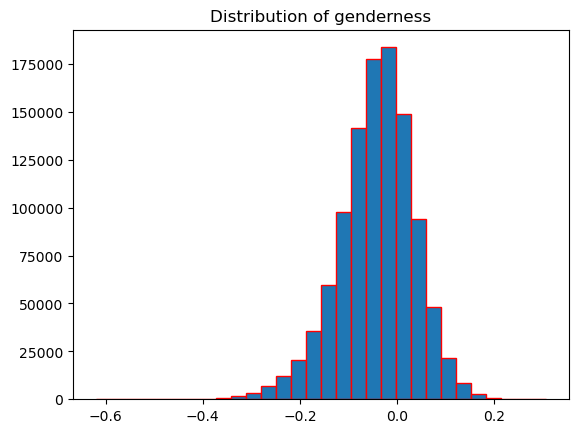

In [30]:
import matplotlib.pyplot as plt 
plt.hist(y1, edgecolor="red", bins=30) 
plt.title('Distribution of genderness')
plt.show() 

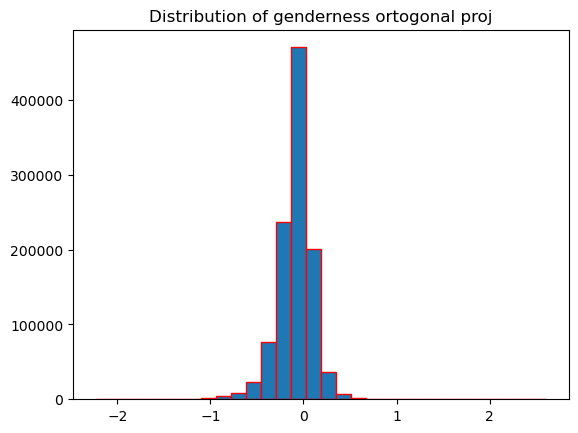

In [31]:
import matplotlib.pyplot as plt 
plt.hist(y2, edgecolor="red", bins=30) 
plt.title('Distribution of genderness ortogonal proj')
plt.show() 